This notebook analyzes the trajectory in the combiner, and finds the output angle of the particle's trajectory, as well as it's output position in the y direction. The force is from assuming the field is purely quadrupole and dipole.

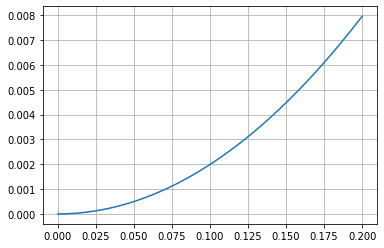

output angle in xy plane, rad 0.07945130224178842
offset in y direction 0.007961890448108933


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as spo
m_Actual = 1.1648E-26  # mass of lithium 7, SI
u0_Actual = 9.274009994E-24 # bohr magneton, SI

u0=u0_Actual/m_Actual
m=1
L=.2


def force(q,c1=1,c2=20):
  B0=np.sqrt((c2*q[2])**2+(c1+c2*q[1])**2)
  F=np.zeros(3)

  F[1]=u0*c2*(c1+c2*q[1])/B0
  F[2]=u0*c2**2*q[2]/B0
  return  F

q=np.asarray([0,0,0e-3])
p=np.asarray([200.0,0,0])
qList=[]
pList=[]
qList.append(q)
pList.append(p)
h=1e-9
while q[0]<L:
  F=force(q)
  a=F/m
  q_n=q+(p/m)*h+.5*a*h**2
  F_n=force(q_n)
  a_n = F_n / m  # acceleration new or acceleration sub n+1
  p_n=p+m*.5*(a+a_n)*h
  qList.append(q_n)
  pList.append(p_n)
  p=p_n
  q=q_n
qArr=np.asarray(qList)
plt.plot(qArr[:,0],qArr[:,1])
plt.grid()
plt.show()
outputAngle=np.arctan2(p[1],p[0])
outputOffset=q[1]
print('output angle in xy plane, rad',outputAngle)
print('offset in y direction',q[1])

In [2]:
def trajectory(x,c):
  return c*x**2
params=spo.curve_fit(trajectory,qArr[:,0],qArr[:,1])[0][0]
print(np.round(params,10))

0.1990472612
